In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import re
import numpy as np

In [ ]:
! kaggle datasets download -d dominoweir/skincare-product-ingredients
! unzip skincare-product-ingredients.zip -d data

Dataset URL: https://www.kaggle.com/datasets/dominoweir/skincare-product-ingredients
License(s): copyright-authors
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 30.5MB/s]
Archive:  skincare-product-ingredients.zip
  inflating: data/cosmetic_p.csv     


In [ ]:
df = pd.read_csv("data/cosmetic_p.csv")
df

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


In [ ]:
# Drop columns
columns_to_drop = ['Label', 'brand', 'name', 'price', 'rank']
df = df.drop(columns=columns_to_drop)
df

,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...
1467,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


In [ ]:
print("===== info =====")
print(df.info())
print("")
print("===== is null =====")
print(df.isna().sum())
print("")
print("===== describe =====")
print(df.describe())
print("")
print("===== describe all =====")
print(df.describe(include='all'))
print("")
print("===== duplicated =====")
print("Data duplicated: ", df.duplicated().sum())

===== info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ingredients  1472 non-null   object
 1   Combination  1472 non-null   int64 
 2   Dry          1472 non-null   int64 
 3   Normal       1472 non-null   int64 
 4   Oily         1472 non-null   int64 
 5   Sensitive    1472 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 69.1+ KB
None

===== is null =====
ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

===== describe =====
       Combination          Dry       Normal         Oily    Sensitive
count   1472.00000  1472.000000  1472.000000  1472.000000  1472.000000
mean       0.65625     0.614130     0.652174     0.607337     0.513587
std        0.47512     0.486965     0.476442     0.488509     0.499985
min        0.00000     0.000000     0.000000     0.

## Cleaning Data

Handling duplicated data

In [ ]:
duplicates = df[df.duplicated()]
duplicates

,ingredients,Combination,Dry,Normal,Oily,Sensitive
20,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
26,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
38,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
108,Visit the Shiseido boutique,0,0,0,0,0
176,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",1,1,1,1,1
...,...,...,...,...,...,...
1351,Visit the Estée Lauder boutique,0,0,0,0,0
1355,No Info,0,0,0,0,0
1369,Visit the Dior boutique,0,0,0,0,0
1396,Visit the Clarins boutique,0,0,0,0,0


In [ ]:
df.drop_duplicates(inplace=True)
print("===== duplicated =====")
print("Data duplicated: ", df.duplicated().sum())

===== duplicated =====
Data duplicated:  0


Handling ingredients which is not necessary

In [ ]:
# List of values to drop
values_to_drop = [
    '* 100% Natural Fragrance', '* Essential Oil', '* Hadasei-3', '* essential oil',
    '**Essential Oil.', '**From essential oils.', '**Natural.', '*100% Natural Fragrance',
    '*Certified Organic', '*Essential Oil', '*Fragrances of natural origin.',
    '*Plant origin.', '*plant origin', '100% Unrefined Sclerocraya Birrea (Marula) Kernel Oil.',
    'No Info', '*Ingredients from organic farming. **Clinical grade essential oils blend.', 'This ingredient list is subject to change, it is the most up-to-date ingredient list and may differ from product packaging.'
]

# Drop rows where 'ingredients' column matches any value in the list
df = df[~df['ingredients'].isin(values_to_drop)]

# Drop rows where 'ingredients' contains the word 'Visit'
df = df[~df['ingredients'].str.contains('Visit', case=False, na=False)]
df

,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...
1466,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
1467,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0


Handling combination, dry, normal, oily, sensitive data same value 0

In [ ]:
# Specify the columns to check
columns_to_check = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

# Drop rows where all values in the specified columns are 0
df = df.loc[~(df[columns_to_check].eq(0).all(axis=1))]

df

,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...
1458,"Alcohol (Organic), Algae Extract (Organic), Al...",1,1,1,1,1
1459,"Water, Caprylic/Caprlc Triglyceride, Glycerin,...",1,1,1,1,0
1460,"-Homosalate 10%, Octinoxate 7.5%, Octisalate 5...",1,1,1,1,0
1464,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1,1,1,1,1


<ipython-input-10-29bc77b14083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_ones'] = df[columns_to_check].sum(axis=1)
<ipython-input-10-29bc77b14083>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ones_count.index, y=ones_count.values, palette="Blues_d")


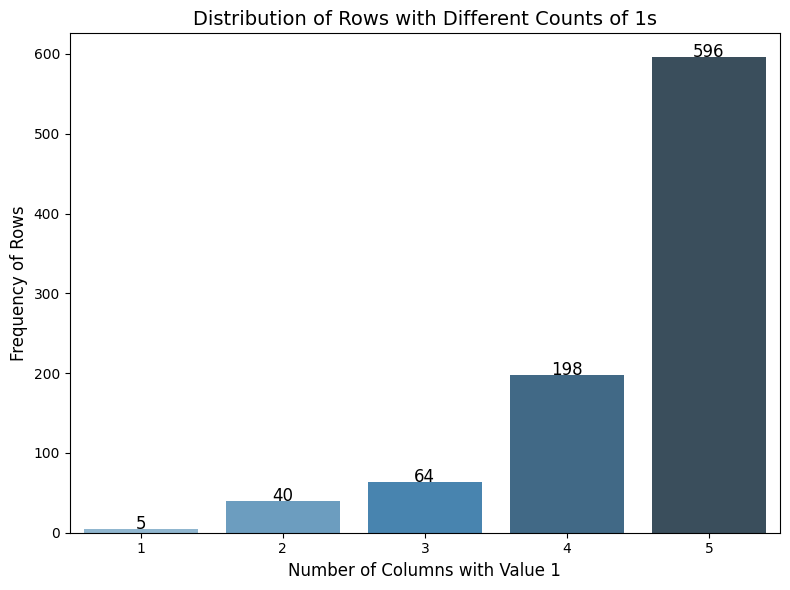

In [ ]:
# Count the number of 1s in each row
df['num_ones'] = df[columns_to_check].sum(axis=1)

# Count the frequency of each number of 1s (how many rows have 1, 2, 3, etc. 1s)
ones_count = df['num_ones'].value_counts().sort_index()

# Plotting the distribution of rows with different counts of 1s
plt.figure(figsize=(8, 6))

# Create a bar plot
sns.barplot(x=ones_count.index, y=ones_count.values, palette="Blues_d")

# Annotate each bar with its value
for i, value in enumerate(ones_count.values):
    plt.text(i, value + 0.1, str(value), ha='center', fontsize=12)

# Formatting the plot
plt.title("Distribution of Rows with Different Counts of 1s", fontsize=14)
plt.xlabel("Number of Columns with Value 1", fontsize=12)
plt.ylabel("Frequency of Rows", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Drop columns num_ones
df = df.drop(columns='num_ones')
df

,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...
1458,"Alcohol (Organic), Algae Extract (Organic), Al...",1,1,1,1,1
1459,"Water, Caprylic/Caprlc Triglyceride, Glycerin,...",1,1,1,1,0
1460,"-Homosalate 10%, Octinoxate 7.5%, Octisalate 5...",1,1,1,1,0
1464,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1,1,1,1,1


Casefolding

In [ ]:
# Casefolding
def case_lower(lowercase):
    lowercase = lowercase.lower() #Lowercase Teks
    return lowercase

dfCasefolding = df['ingredients'].apply(case_lower)
dfCasefolding

,ingredients
0,"algae (seaweed) extract, mineral oil, petrolat..."
1,"galactomyces ferment filtrate (pitera), butyle..."
2,"water, dicaprylyl carbonate, glycerin, ceteary..."
3,"algae (seaweed) extract, cyclopentasiloxane, p..."
4,"water, snail secretion filtrate, phenyl trimet..."
...,...
1458,"alcohol (organic), algae extract (organic), al..."
1459,"water, caprylic/caprlc triglyceride, glycerin,..."
1460,"-homosalate 10%, octinoxate 7.5%, octisalate 5..."
1464,"water, cyclopentasiloxane, butyloctyl salicyla..."


Cleaning Symbols

In [ ]:
# Define the cleaning function
def clean_ingredients(ingredient):
    # 1. Remove (-) at the start, replace (-)
    # Remove '(-)' at the start
    if ingredient.startswith('(-)'):
      ingredient = ingredient[4:].strip()
    elif ingredient.startswith('-'):
      ingredient = ingredient[1:].strip()
    # Remove symbol '+/-'
    ingredient = re.sub(r'\+\s*/\s*-\s*', '', ingredient)
    # Remove parentheses content except those containing (ci)
    ingredient = re.sub(r'\((?!ci)[^()]*\)', '', ingredient)
    # Remove special characters and non-alphanumeric symbols (except essential ones like %, parentheses, and commas)
    ingredient = re.sub(r'[*�]', '', ingredient)
    ingredient = re.sub(r'[^\w\s,.()%/-]', '', ingredient)
    # Remove "please" clauses
    ingredient = re.sub(r'please.*?list of ingredients\.', '', ingredient)
    # Remove (.) except linked number with percent like 7.5%
    ingredient = re.sub(r'(?<!\d)\.(?!\d*%)', '', ingredient)
    # Remove percentage
    ingredient = re.sub(r'\d+(\.\d+)?%', '', ingredient)
    # Remove specified words
    words_to_remove = ['and', 'contain', 'please', 'be', 'aware', 'that', 'thats', 'list', 'lists', 'may', 'change', 'or', 'vary', 'very', 'from',
                       'time', 'to', 'times', '�', 'refer', 'the', 'product', 'package', 'ingredient', 'ingredients', 'may contain', 'complex', 'helps',
                       'exfoliate', 'dead', 'surface', 'skin', 'cells', 'stimulate', 'cellular', 'turnover', 'soothe', 'calm', 'hydrate', 'loosen', 'sebum',
                       'within', 'pores', 'prevent', 'future', 'breakouts', 'creates', 'a', 'firmer-looking', 'complexion', 'delivers', 'tighter-looking',
                       'tones', 'tightens', 'appearance', 'of', 'with', 'soy', 'isoflavone', 'liposome', 'cosmiplexion', 'supports', 'youthful', 'improves',
                       'firmness', 'enhances', 'radiance', 'step', '01', 'super', 'booster', 'firm', 'for', 'powerful', 'anti-aging', 'effect']
    for word in words_to_remove:
        ingredient = re.sub(r'\b' + word + r'\b', '', ingredient)
    # Replace (/) with (,)
    ingredient = ingredient.replace('/', ',')
    # Remove colors with numbers
    ingredient = re.sub(r'\b(?:red|blue|yellow|green|orange|purple|black|white|brown) \d+\b', '', ingredient)
    # hypen
    ingredient = re.sub(r'(?<=\s)-', ',', ingredient)
    # Remove single letters and numbers only if between (,)
    ingredient = re.sub(r',\s*[a-zA-Z0-9]\s*,', ',', ingredient)
    # Replace ", ," with ","
    ingredient = re.sub(r',\s*,', ',', ingredient)
    # Remove (.) and (,) at the end of the sentence
    ingredient = ingredient.rstrip('.')
    ingredient = ingredient.rstrip(',')
    # Normalize whitespace
    ingredient = re.sub(r'\s+', ' ', ingredient).strip()
    return ingredient

dfCleaningSymbols = dfCasefolding.apply(clean_ingredients)
dfCleaningSymbols

,ingredients
0,"algae extract, mineral oil, petrolatum, glycer..."
1,"galactomyces ferment filtrate , butylene glyco..."
2,"water, dicaprylyl carbonate, glycerin, ceteary..."
3,"algae extract, cyclopentasiloxane, petrolatum,..."
4,"water, snail secretion filtrate, phenyl trimet..."
...,...
1458,"alcohol , algae extract , aloe barbadensis lea..."
1459,"water, caprylic,caprlc triglyceride, glycerin,..."
1460,"homosalate , octinoxate , octisalate , avobenz..."
1464,"water, cyclopentasiloxane, butyloctyl salicyla..."


Combine datasets

In [ ]:
df = pd.DataFrame({
    'ingredients' : dfCleaningSymbols,
    'combination'	: df['Combination'],
    'dry' : df['Dry'],
    'normal' : df['Normal'],
    'oily' : df['Oily'],
    'sensitive' : df['Sensitive']
})

df

,ingredients,combination,dry,normal,oily,sensitive
0,"algae extract, mineral oil, petrolatum, glycer...",1,1,1,1,1
1,"galactomyces ferment filtrate , butylene glyco...",1,1,1,1,1
2,"water, dicaprylyl carbonate, glycerin, ceteary...",1,1,1,1,0
3,"algae extract, cyclopentasiloxane, petrolatum,...",1,1,1,1,1
4,"water, snail secretion filtrate, phenyl trimet...",1,1,1,1,1
...,...,...,...,...,...,...
1458,"alcohol , algae extract , aloe barbadensis lea...",1,1,1,1,1
1459,"water, caprylic,caprlc triglyceride, glycerin,...",1,1,1,1,0
1460,"homosalate , octinoxate , octisalate , avobenz...",1,1,1,1,0
1464,"water, cyclopentasiloxane, butyloctyl salicyla...",1,1,1,1,1


In [ ]:
dfOutputCSV = df.to_csv('datapreprocessing.csv', index=False)
# dfOutputExcel = df.to_excel('datapreprocessing.xlsx', sheet_name='datapreprocessing')